In [ ]:
!pip install anvil-uplink

     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 51 kB 195 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=042de556bd16d23d7cadf048ce41b5db1b5b1e42784db2216320d3a2513b5cc7
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [ ]:
import anvil.server

In [ ]:
anvil.server.connect("6I7QELWOTF5RYCXSYW2N2XEF-YLGBYHVTXYTSLCAW")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/spam_ham_dataset.csv')
data.head()

Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0

In [ ]:
def getSubject(email):
    subject = email[0:email.find('\r\n')]
    subject = subject. replace('Subject: ', '')
    return subject

def getBody(email):
    body = email[email.find('\r\n')+2:]
    return body

In [ ]:
data = data.drop(['Unnamed: 0', 'label'], axis=1)

data['subject'] = data['text'].apply(lambda x: getSubject(x))
data['body'] = data['text'].apply(lambda x: getBody(x))

data = data.drop(['text'], axis=1)

data

label_num                                            subject  \
0             0                  enron methanol ; meter # : 988291   
1             0                       hpl nom for january 9 , 2001   
2             0                                       neon retreat   
3             1  photoshop , windows , office . cheap . main tr...   
4             0                                re : indian springs   
...         ...                                                ...   
5166          0                               put the 10 on the ft   
5167          0                    3 / 4 / 2000 and following noms   
5168          0                       calpine daily gas nomination   
5169          0     industrial worksheets for august 2000 activity   
5170          1                     important online banking alert   

                                                   body  
0     this is a follow up to the note i gave you on ...  
1     ( see attached file : hplnol 09 . xls )\r\n- h...  
2     ho ho ho , we ' re around to that most wonderf...  
3     abasements darer prudently fortuitous undergon...  
4     this deal is to book the teco pvr revenue . it...  
...                                                 ...  
5166  the transport volumes decreased from 25000 to ...  
5167  hpl can ' t take the extra 15 mmcf / d over th...  
5168  >\r\n>\r\njulie , as i mention earlier we hope...  
5169  attached are the worksheets for august 2000 ac...  
5170  dear valued citizensr bank member ,\r\ndue to ...  

[5171 rows x 3 columns]

In [ ]:
X = data['subject']+' '+data['body']
Y = data['label_num']


In [ ]:
X

0       enron methanol ; meter # : 988291 this is a fo...
1       hpl nom for january 9 , 2001 ( see attached fi...
2       neon retreat ho ho ho , we ' re around to that...
3       photoshop , windows , office . cheap . main tr...
4       re : indian springs this deal is to book the t...
                              ...                        
5166    put the 10 on the ft the transport volumes dec...
5167    3 / 4 / 2000 and following noms hpl can ' t ta...
5168    calpine daily gas nomination >\r\n>\r\njulie ,...
5169    industrial worksheets for august 2000 activity...
5170    important online banking alert dear valued cit...
Length: 5171, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nx = []

for sent in X:
  words = nltk.word_tokenize(sent)
  words = [word for word in words if word.isalnum()]
  words = [word for word in words if word not in set(stopwords.words("english"))]
  nx.append(words)


In [ ]:
nx

[['enron',
  'methanol',
  'meter',
  '988291',
  'follow',
  'note',
  'gave',
  'monday',
  '4',
  '3',
  '00',
  'preliminary',
  'flow',
  'data',
  'provided',
  'daren',
  'please',
  'override',
  'pop',
  'daily',
  'volume',
  'presently',
  'zero',
  'reflect',
  'daily',
  'activity',
  'obtain',
  'gas',
  'control',
  'change',
  'needed',
  'asap',
  'economics',
  'purposes'],
 ['hpl',
  'nom',
  'january',
  '9',
  '2001',
  'see',
  'attached',
  'file',
  'hplnol',
  '09',
  'xls',
  'hplnol',
  '09',
  'xls'],
 ['neon',
  'retreat',
  'ho',
  'ho',
  'ho',
  'around',
  'wonderful',
  'time',
  'year',
  'neon',
  'leaders',
  'retreat',
  'time',
  'know',
  'time',
  'year',
  'extremely',
  'hectic',
  'tough',
  'think',
  'anything',
  'past',
  'holidays',
  'life',
  'go',
  'past',
  'week',
  'december',
  '25',
  'january',
  '1',
  'like',
  'think',
  'minute',
  'calender',
  'handed',
  'beginning',
  'fall',
  'semester',
  'retreat',
  'scheduled',
  

In [ ]:
ne = []
for st in nx:
  s= ' '.join([str(item) for item in st])
  ne.append(s)
ne

['enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes',
 'hpl nom january 9 2001 see attached file hplnol 09 xls hplnol 09 xls',
 'neon retreat ho ho ho around wonderful time year neon leaders retreat time know time year extremely hectic tough think anything past holidays life go past week december 25 january 1 like think minute calender handed beginning fall semester retreat scheduled weekend january 5 6 youth ministers conference brad dustin connected week going change date following weekend january 12 13 comes part need think think agree important us get together time recharge batteries get far spring semester lot trouble difficult us get away without kids etc brad came potential alternative get together weekend let know prefer first option would retreat similar done past several years year could go heartland coun

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(ne,Y, stratify=Y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')


In [ ]:
x_train= vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
x_train

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 7, 0, ..., 0, 0, 0]])

## Naive bayes Classifier

[0 1 1 ... 1 0 0]


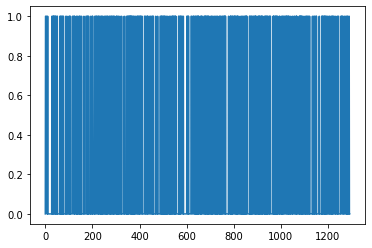

[[903  15]
 [ 16 359]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       918
           1       0.96      0.96      0.96       375

    accuracy                           0.98      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293



In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

predictions = model.predict(x_test)
print(predictions)

plt.plot(predictions)
plt.show()

from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

print(metrics.classification_report(y_test,predictions))


In [ ]:
metrics.accuracy_score(y_test, predictions)

0.9760247486465584

## SVM Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0 1 1 ... 1 0 0]


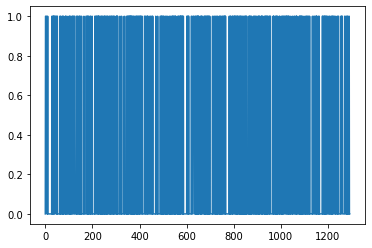

[[899  19]
 [ 14 361]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       918
           1       0.95      0.96      0.96       375

    accuracy                           0.97      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.97      0.97      0.97      1293



In [ ]:
# from sklearn.svm import LinearSVC
# model2 = LinearSVC()
# model2.fit(x_train,y_train)

# predictions = model2.predict(x_test)
# print(predictions)

# plt.plot(predictions)
# plt.show()

# from sklearn import metrics
# print(metrics.confusion_matrix(y_test,predictions))

# print(metrics.classification_report(y_test,predictions))

In [ ]:
metrics.accuracy_score(y_test, predictions)

0.974477958236659

##Decision Tree Classifier

[0 1 1 ... 1 0 0]


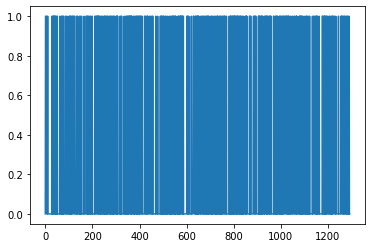

[[886  32]
 [ 21 354]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       918
           1       0.92      0.94      0.93       375

    accuracy                           0.96      1293
   macro avg       0.95      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293



In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree

# model3 = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# model3.fit(x_train,y_train)

# predictions = model3.predict(x_test)
# print(predictions)

# plt.plot(predictions)
# plt.show()

# from sklearn import metrics
# print(metrics.confusion_matrix(y_test,predictions))

# print(metrics.classification_report(y_test,predictions))

In [ ]:
metrics.accuracy_score(y_test, predictions)

0.9590100541376644

In [ ]:
# print(model.predict(vec.transform([''])))

In [ ]:
@anvil.server.callable
def predict(message):
  classification = model.predict(vec.transform([message]))
  return classification

In [ ]:
anvil.server.wait_forever()